# Avacado Project

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#### features:

Unamed: 0 -	feature which has no relation to avacados

Total Volume -	Total sales volume of avocados

4046 - Total sales volume of Small/Medium Hass Avocado

4225 - Total sales volume of Large Hass Avocado

4770 - Total sales volume of Extra Large Hass Avocado

Total Bags -	Total number of Bags sold

Small Bags - Total number of Small Bags sold

Large Bags -	Total number of Large Bags sold

XLarge Bags - Total number of XLarge Bags sold

#### labels:

average price - a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags

region - regions where avacados are sold

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#reading csv file and storing in df  
# had to use double slash because of unicode error
df=pd.read_csv("C:\\Users\\JOHN TOJO\\Desktop\\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### check for duplicates

In [3]:
df.duplicated().sum()

0

 no duplicates present

#### checking nulls

In [4]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

no nulls present

#### checking datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- has 18249 rows and 14 columns
- Date, type and region are object data type
- all other feaures are numerical

#### dropping   Unnamed: 0 as it is similar to serial number 

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### modifying date column

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


#### deleting Date as we have split it into day, month and year

In [8]:
df.drop(['Date'],axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


#### checking how the data is defined statistically (numerical)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


- Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags
    - the mean by std ratio is 0.25, even the differnece between quantile is not uniform
    - this can be due to retailers considered who does the business in small and large scale


- year, month and date are categorical numerical column
    
      

#### checking how the data is defined statistically (object)

In [10]:
df.describe(include=[object]).T

,count,unique,top,freq
type,18249,2,conventional,9126
region,18249,54,Albany,338


- type 
    - has 2 unique datas
    - conventional and organic


- region
  - has 54 unique regions
 

#### plotting numerical continuous data type

In [11]:
#numericalColumn stores all data that are numerical datatype
numericalColumns=df.select_dtypes(include=np.number).columns
numericalColumns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day'],
      dtype='object')

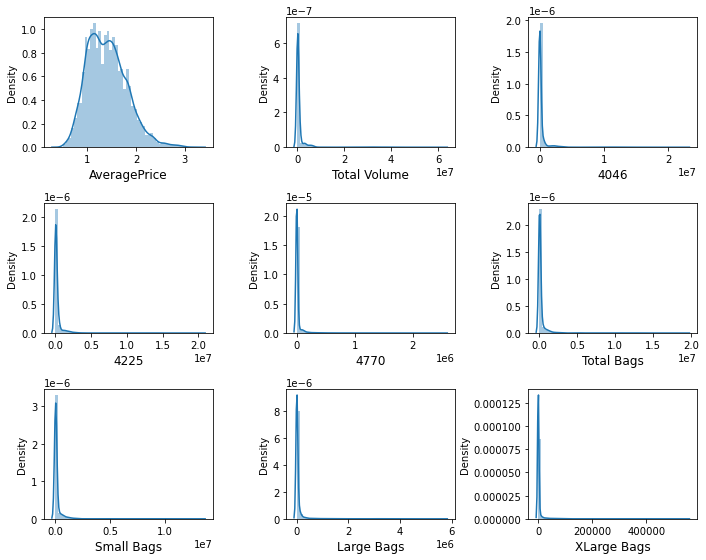

In [12]:
#numericalColumn stores all data that are numerical datatype
numericalColumns=df.select_dtypes(include=np.number).columns
numericalColumns=numericalColumns.drop(['year','Month','Day'])
j=0
plt.figure(figsize=(10,10))
for column in numericalColumns:
    plt.subplot(4,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

     
-  AveragePrice
    - uniformly distributed
    - range 0.5 -3, peak at 1.5
    - most of the retailer are willing to sell it at 1.5/unit 
    
    
-   Total Volume
    - not uniformly distributed
    - range is from 0.15 e7 to 0.5 e7 this is bcause small scale retailers are dominant in the survery
    - presence of outliers, this is because of high scale retailers in the market
    
    
-   4046, 4225, 4770
    - not uniformly distributed
    - range is from 0.15 e7 to 0.5 e7 this is bcause small scale retailers are dominant in the survery
    - presence of outliers, this is because of high scale retailers in the market
    - the 4046 is the item which is sold the most or preferred by the retailers based on max value and mean
    - 4770 is least preferred by the retailers based on max value and  mean


- Total Bags, Small Bags, Large Bags, XLarge Bags
    - not uniformly distributed
    - high skewness

#### plotting numerical categorical data type

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64
1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64
4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Day, dtype: int64


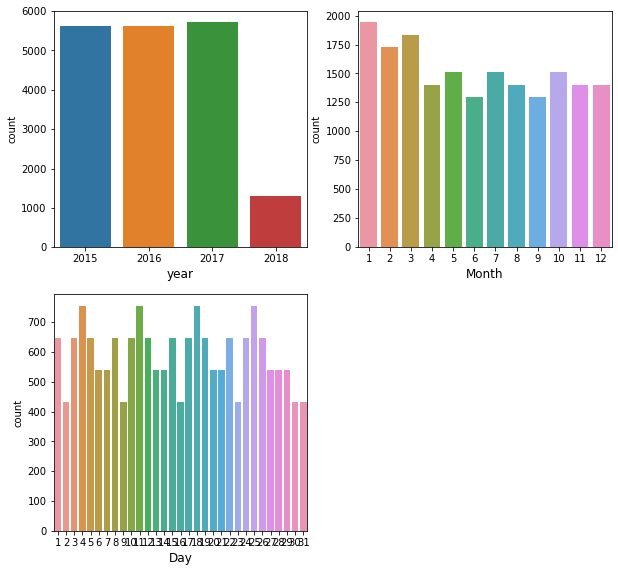

In [13]:
plt.figure(figsize=(10,20))
j=0
for column in df[['year','Month','Day']]:
    plt.subplot(4,2,j+1)
    sns.countplot(df[column])
    plt.xlabel(column,fontsize=12)
    print(df[column].value_counts())
    j+=1
plt.show()    

- Year
    - there is a slight increase from 2015 to 2017
    - 2018 there is a less data compared to other years 


- Month 
    - jan has the highest demand for avacados, followed by march, as there is large accumulation of data around these months


- Day
    -  5, 11, 18, 25 day has huge demand for avacado   


#### Categorical datas

conventional    9126
organic         9123
Name: type, dtype: int64


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California   

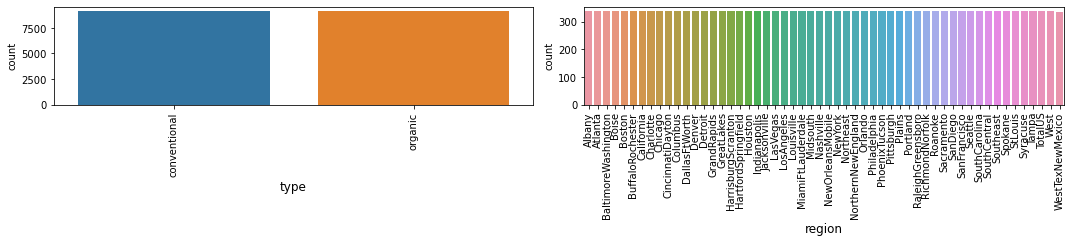

In [14]:
#objectColumns stores all data that are objject datatype
objectColumns=df.select_dtypes(include=np.object).columns
j=0
plt.figure(figsize=(15,15))
for column in objectColumns:
    plt.subplot(5,2,j+1)
    sns.countplot(df[column])
    plt.xlabel(column,fontsize=12)
    plt.xticks(rotation=90)
    print(df[column].value_counts())
    print('\n')
    j+=1
plt.tight_layout() 

- region
    - all regions have equal dustribution of retailers
    

- type
    - both have equal distribution

#### encoding categorical column

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in objectColumns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1,14


#### Bivariate analysis

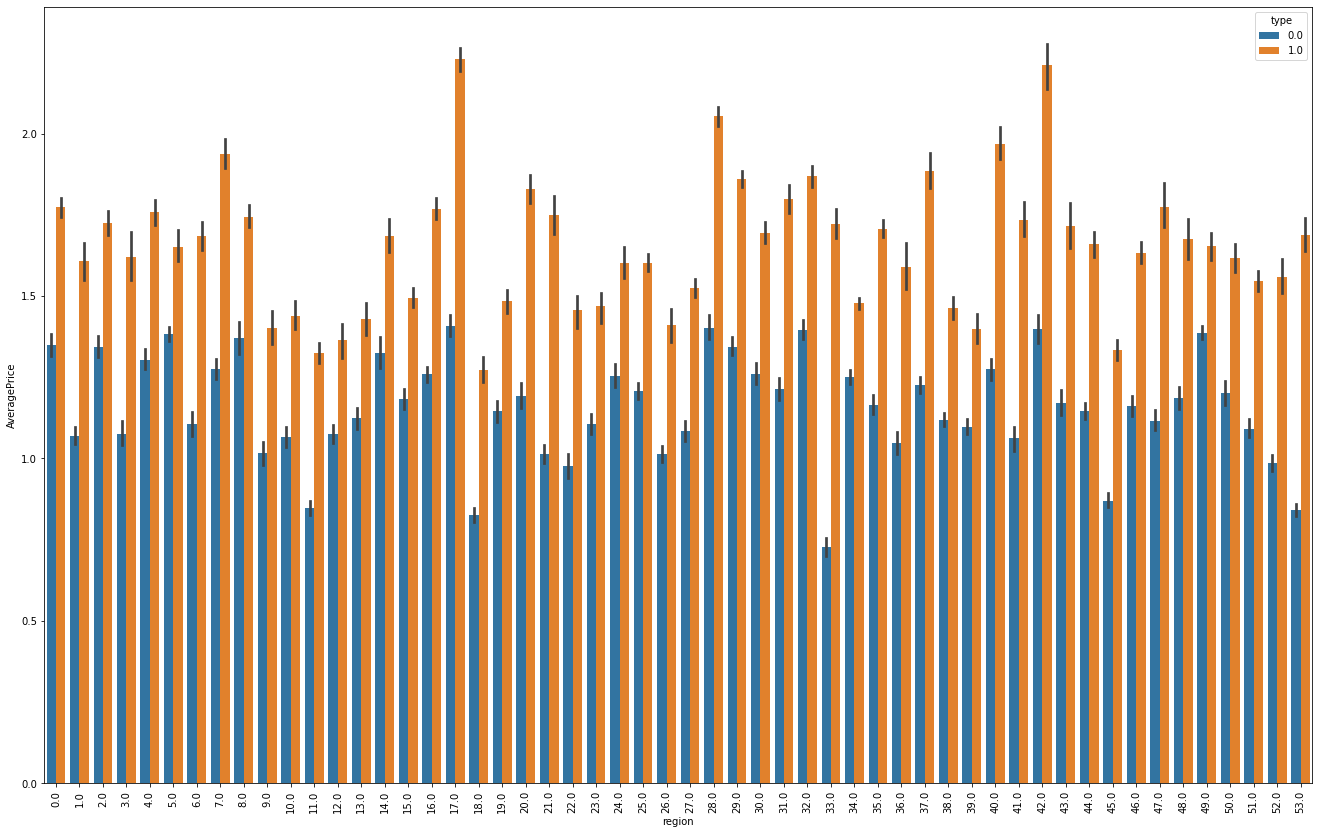

In [16]:
plt.figure(figsize=(50,100))
plt.subplot(6,2,j+1)
sns.barplot(y=df['AveragePrice'],x=df['region'],data=df,hue=df['type'])
plt.xticks(rotation=90)
plt.show()

- there seems to be some fluctutaion in prices in different region 
- region 42 has the highest average price  followed by 17 for conventional avacados 
- there are many regions which have the same highest average price for organic avacados 

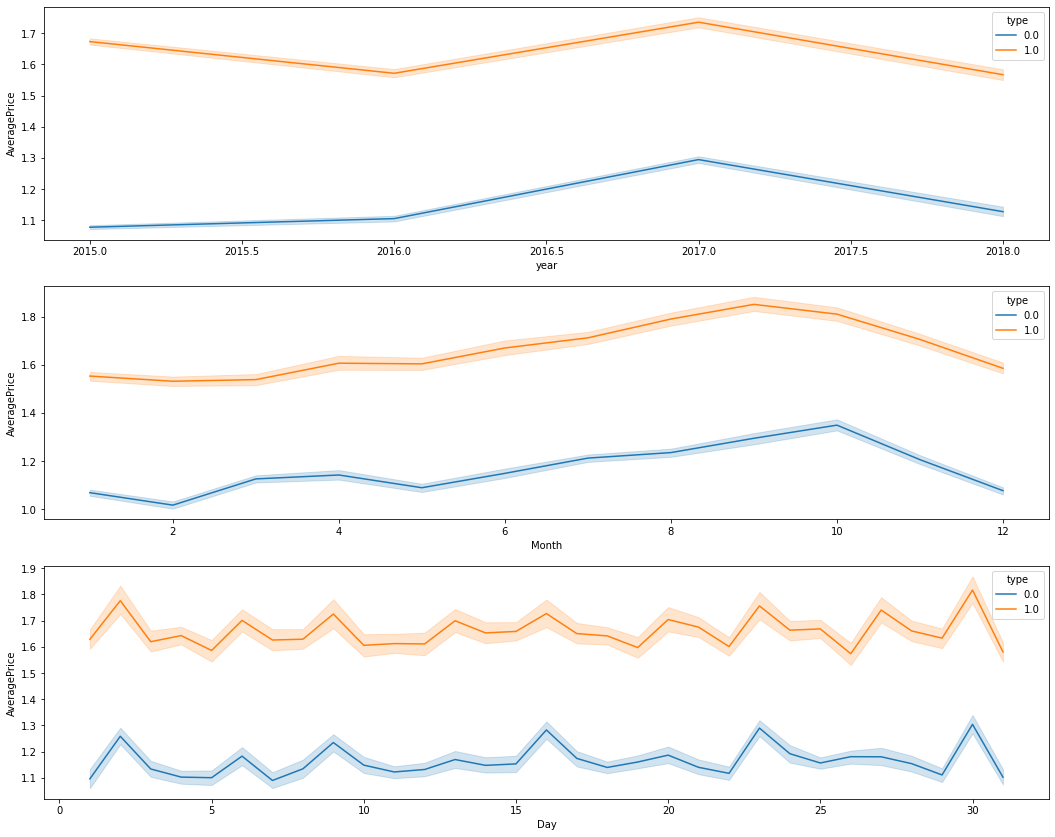

In [17]:
j=0
plt.figure(figsize=(18,30))
for column in df[["year",'Month','Day']]:
    plt.subplot(6,1,j+1)  
    sns.lineplot(x=df[column], y="AveragePrice", hue='type', data=df)
    j+=1


plt.show()

-  price for organic is more compare to conventional avacado

- Yearly 
    - price increase till 2017 then drops drastically in 2018


- Monthly
    - conventional (0)
        - has decreasing trend in the first two month 
        - then it increases and stabilises by 5th month
        - then there is a sudden increase in price till 10th month followed by a sudden decline
        
    - organic (1)
        - the first two months the price remanins the same and slowly increases till 5th month followed by sharp increases till 10th and a sudden decline

- Day 
    - the price is slowly dropping till 2016-05 then increases in fast manner till 2016-11, then showed a pull back for the rise til 2017-01 and continued with the raising its price till 2017-09, after which it underwent a correction showing the turbulant nature of the lines
    

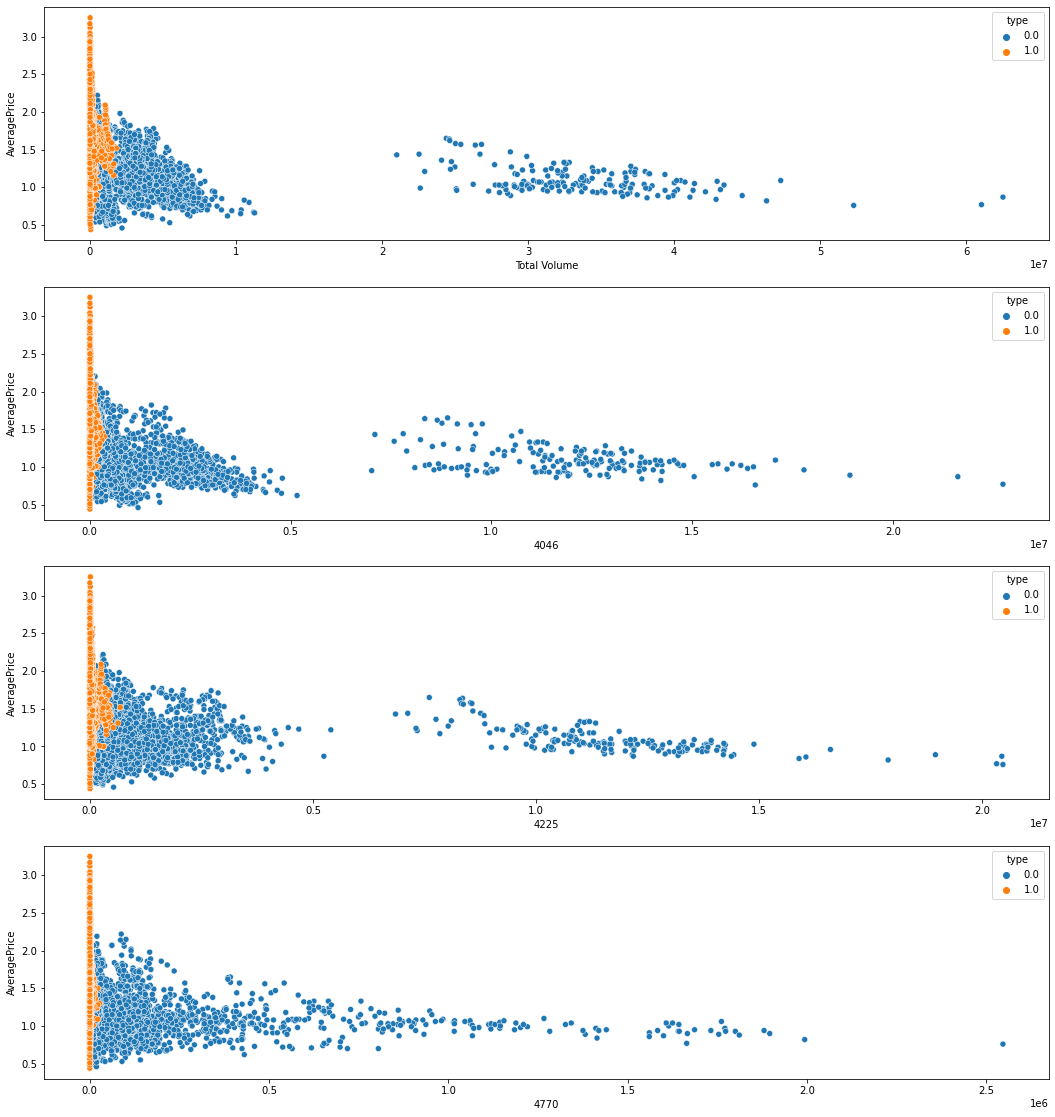

In [18]:
j=0
plt.figure(figsize=(18,30))
for column in df[['Total Volume', '4046', '4225', '4770']]:
    plt.subplot(6,1,j+1)  
    sns.scatterplot(x=df[column], y="AveragePrice", hue='type', data=df)
    j+=1


plt.show()

 - AveragePrice and Total Volume
    - large concentration of retailers are small scaled 
    - 0.1 e7 to 0.5 e7 is the quantity of organic avacado being sold, among which region 9, 13, 15, 17, 19, 23, 27 contributes the most
    - conventional avacado is more in demand compared to organic as it has total volume in 2-4 e7 in some regions 
    
    
    
- 4046, 4225, 4770
    -  most preferred average price for organic avacado is around 2 , 1.75, 2.25 for 4046, 4225 amd 4770 respectively
    -  most preferred average price for conventional avacado is around 1-1.25, 0.75-1, 0.75-1.05 for 4046, 4225 amd 4770 respectively
    -  therefore the demand for conventional avacados is more than organic 

    


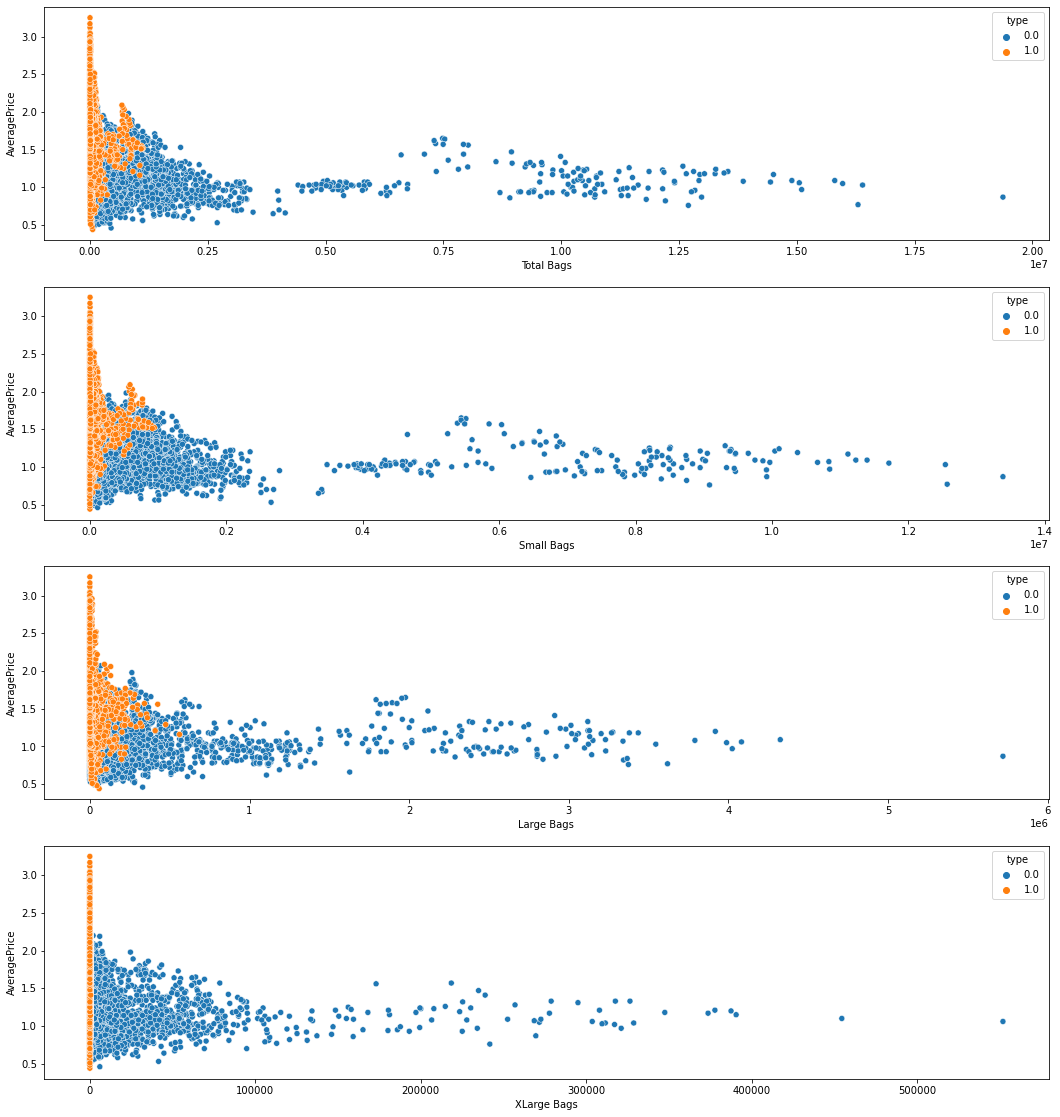

In [19]:
j=0
plt.figure(figsize=(18,30))
for column in df[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]:
    plt.subplot(6,1,j+1)  
    sns.scatterplot(x=df[column], y="AveragePrice", hue='type', data=df)
    j+=1


plt.show()

- average price and Total Bags, small bags ,large bags, xlarge bags
    - average price for organic is 2, 2, 1.75, 1.5 for total, small, large and xlarge bags respectively
    - average price for conventional is 1-1.5, 0.75-1, 0.7-0.85, 0.7-0.8
    - the no. of bags required is more fo conventional
    

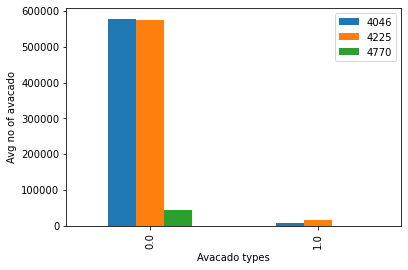

In [20]:
types=df.groupby('type')[['4046', '4225', '4770']].mean()
ax=types.plot(y=['4046', '4225', '4770'],kind='bar')
plt.ylabel(ylabel='Avg no of avacado')
plt.xlabel(xlabel='Avacado types')
plt.show()

- conventional avacados are prefered more when compared with organic avacados could be due to price differnce

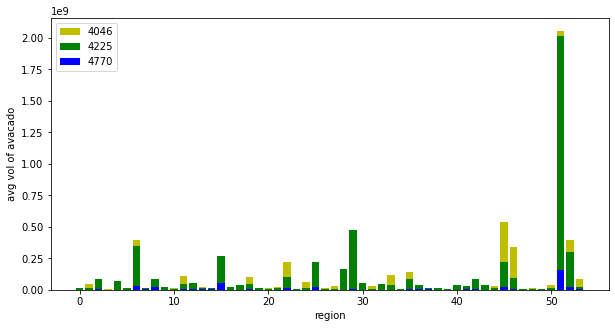

In [22]:
types=df.groupby('region',as_index=False)[['4046', '4225', '4770']].sum()
x=types['region']
y1=types['4046']
y2=types['4225']
y3=types['4770']

plt.figure(figsize=(10,5))
plt.bar(x,y1,color='y')
plt.bar(x,y2,color='g')
plt.bar(x,y3,color='b')
plt.xlabel('region')
plt.ylabel('avg vol of avacado')
plt.legend(['4046','4225','4770'])
plt.show()

- region 46 followed by 47 consumes large amount of 4046 avacado 
- region 29 consumes large amount of 4225 avacado 
- region 15 consumes large amount of 4770
- region 51 represent the total us which is sum of all the avacados used in all regions 

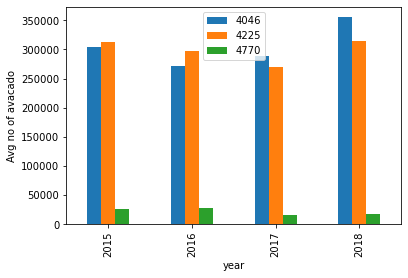

In [23]:
types=df.groupby('year')[['4046', '4225', '4770']].mean()
ax=types.plot(y=['4046', '4225', '4770'],kind='bar')
plt.ylabel(ylabel='Avg no of avacado')
plt.xlabel(xlabel='year')
plt.show()

- 2015 
    - 4225 is the most selling avacado followed by 4046 then 4770
    - highest demand for 4225 when compared with other years 
    - difference between 4046 and 4225 is very small
    - very less demand for 4770
    
    
-  2016
    - same pattern as in 2015
    - demand for 4225 and 4046 reduced
    
    
- 2017     
    - 4046 is more in demand compared to 4225
    - consumer sentiment towards the types has changed
    - demand for 4770 decreased
    
    
- 2018
    - highest demand for 4046 when compared with other years
    - second highest dema for 4225 when compared with other years
    - consumer sentiment same as of 2017
    

#### check skewness

In [30]:
df.skew().sort_values()

region           0.000030
type             0.000329
Day              0.014310
Month            0.106617
year             0.215339
AveragePrice     0.580303
4046             8.648220
4225             8.942466
Total Volume     9.007687
Small Bags       9.540660
Total Bags       9.756072
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

high skewness need to treat 

In [31]:
cols_to_be_checked=["4046","4225","Total Volume","Small Bags",'Total Bags','Large Bags','4770','XLarge Bags']
for col in df.skew().index:
    if col in cols_to_be_checked:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])
            
df.skew().sort_values()           

region          0.000030
type            0.000329
Day             0.014310
Month           0.106617
year            0.215339
AveragePrice    0.580303
4225            3.896355
4046            3.952972
Total Volume    3.986597
Small Bags      4.035940
4770            4.128605
Total Bags      4.128864
Large Bags      4.134963
XLarge Bags     4.827368
dtype: float64

In [32]:
#using power transform to transform and normalize the dataset and storing it in A and copying it to df
from sklearn.preprocessing import power_transform
B=df[cols_to_be_checked].copy()
A=power_transform(B)
A=pd.DataFrame(A,columns=B.columns)
df[B.columns]=A.copy()
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.087128,-0.665056,0.308947,-0.220871,-0.525905,-0.343397,-0.757300,-0.704973,0.0,2015,0.0,12,27
1,1.35,-0.156398,-0.782992,0.232951,-0.179678,-0.487649,-0.309131,-0.748038,-0.704973,0.0,2015,0.0,12,20
2,0.93,0.179300,-0.738250,0.581980,-0.002695,-0.554021,-0.369117,-0.736236,-0.704973,0.0,2015,0.0,12,13
3,1.08,0.003524,-0.640642,0.417134,-0.132212,-0.697930,-0.499814,-0.680812,-0.704973,0.0,2015,0.0,12,6
4,1.28,-0.188351,-0.691703,0.226078,-0.122787,-0.671557,-0.480149,-0.594565,-0.704973,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.675966,-0.473424,-0.924841,-1.256593,-0.335636,-0.181250,-0.411537,-0.704973,1.0,2018,53.0,2,4
18245,1.71,-0.768967,-0.626319,-0.669655,-1.256593,-0.498697,-0.328721,-0.479879,-0.704973,1.0,2018,53.0,1,28
18246,1.87,-0.772922,-0.626268,-0.777339,0.387946,-0.492730,-0.311438,-0.914005,-0.704973,1.0,2018,53.0,1,21
18247,1.93,-0.699469,-0.556613,-0.715076,0.387652,-0.425775,-0.251515,-0.882151,-0.704973,1.0,2018,53.0,1,14


In [33]:
df.skew().sort_values()

Large Bags     -0.069883
4046           -0.019150
4225           -0.016662
Total Bags     -0.001683
region          0.000030
type            0.000329
Small Bags      0.008581
Total Volume    0.012354
Day             0.014310
4770            0.018525
Month           0.106617
year            0.215339
AveragePrice    0.580303
XLarge Bags     0.767239
dtype: float64

almost within limits 

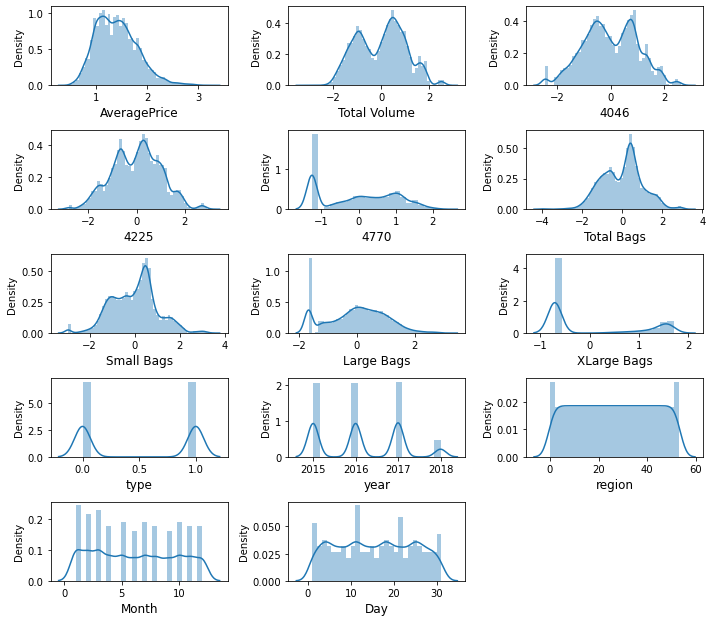

In [34]:
# plotting distribution graph  
j=0
plt.figure(figsize=(10,10))
for column in df:
    plt.subplot(6,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

#### Outliers check

AveragePrice       AxesSubplot(0.125,0.772143;0.133621x0.107857)
Total Volume    AxesSubplot(0.285345,0.772143;0.133621x0.107857)
4046             AxesSubplot(0.44569,0.772143;0.133621x0.107857)
4225            AxesSubplot(0.606034,0.772143;0.133621x0.107857)
4770            AxesSubplot(0.766379,0.772143;0.133621x0.107857)
Total Bags         AxesSubplot(0.125,0.642714;0.133621x0.107857)
Small Bags      AxesSubplot(0.285345,0.642714;0.133621x0.107857)
Large Bags       AxesSubplot(0.44569,0.642714;0.133621x0.107857)
XLarge Bags     AxesSubplot(0.606034,0.642714;0.133621x0.107857)
type            AxesSubplot(0.766379,0.642714;0.133621x0.107857)
year               AxesSubplot(0.125,0.513286;0.133621x0.107857)
region          AxesSubplot(0.285345,0.513286;0.133621x0.107857)
Month            AxesSubplot(0.44569,0.513286;0.133621x0.107857)
Day             AxesSubplot(0.606034,0.513286;0.133621x0.107857)
dtype: object

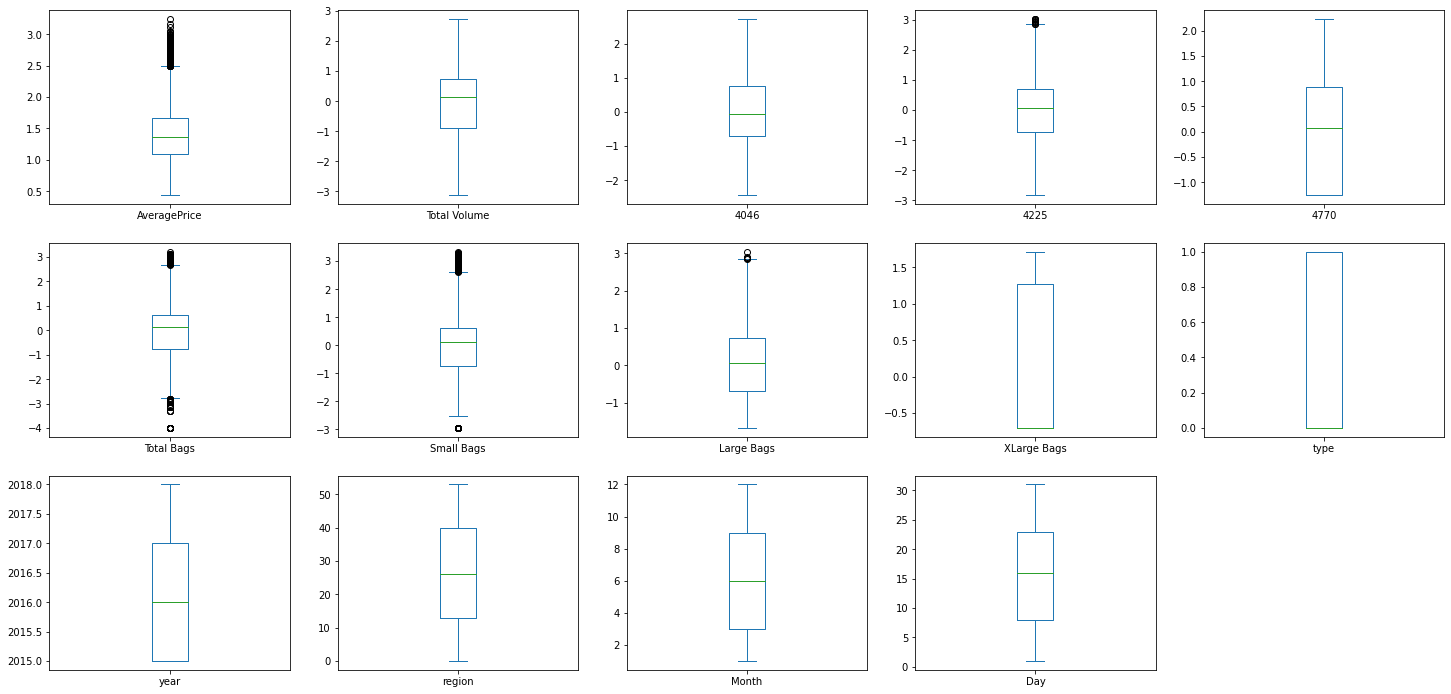

In [35]:
# visualizing
df.plot(kind='box',subplots=True, layout=(6,5),figsize=(25,25))

- Average price has some outlies
- 4225 has some outliers
- total bags has outliers on both sides
- small bags and large bags has outliers as well

#### using z score for treating

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  1.211025261658173  %


AveragePrice       AxesSubplot(0.125,0.772143;0.133621x0.107857)
Total Volume    AxesSubplot(0.285345,0.772143;0.133621x0.107857)
4046             AxesSubplot(0.44569,0.772143;0.133621x0.107857)
4225            AxesSubplot(0.606034,0.772143;0.133621x0.107857)
4770            AxesSubplot(0.766379,0.772143;0.133621x0.107857)
Total Bags         AxesSubplot(0.125,0.642714;0.133621x0.107857)
Small Bags      AxesSubplot(0.285345,0.642714;0.133621x0.107857)
Large Bags       AxesSubplot(0.44569,0.642714;0.133621x0.107857)
XLarge Bags     AxesSubplot(0.606034,0.642714;0.133621x0.107857)
type            AxesSubplot(0.766379,0.642714;0.133621x0.107857)
year               AxesSubplot(0.125,0.513286;0.133621x0.107857)
region          AxesSubplot(0.285345,0.513286;0.133621x0.107857)
Month            AxesSubplot(0.44569,0.513286;0.133621x0.107857)
Day             AxesSubplot(0.606034,0.513286;0.133621x0.107857)
dtype: object

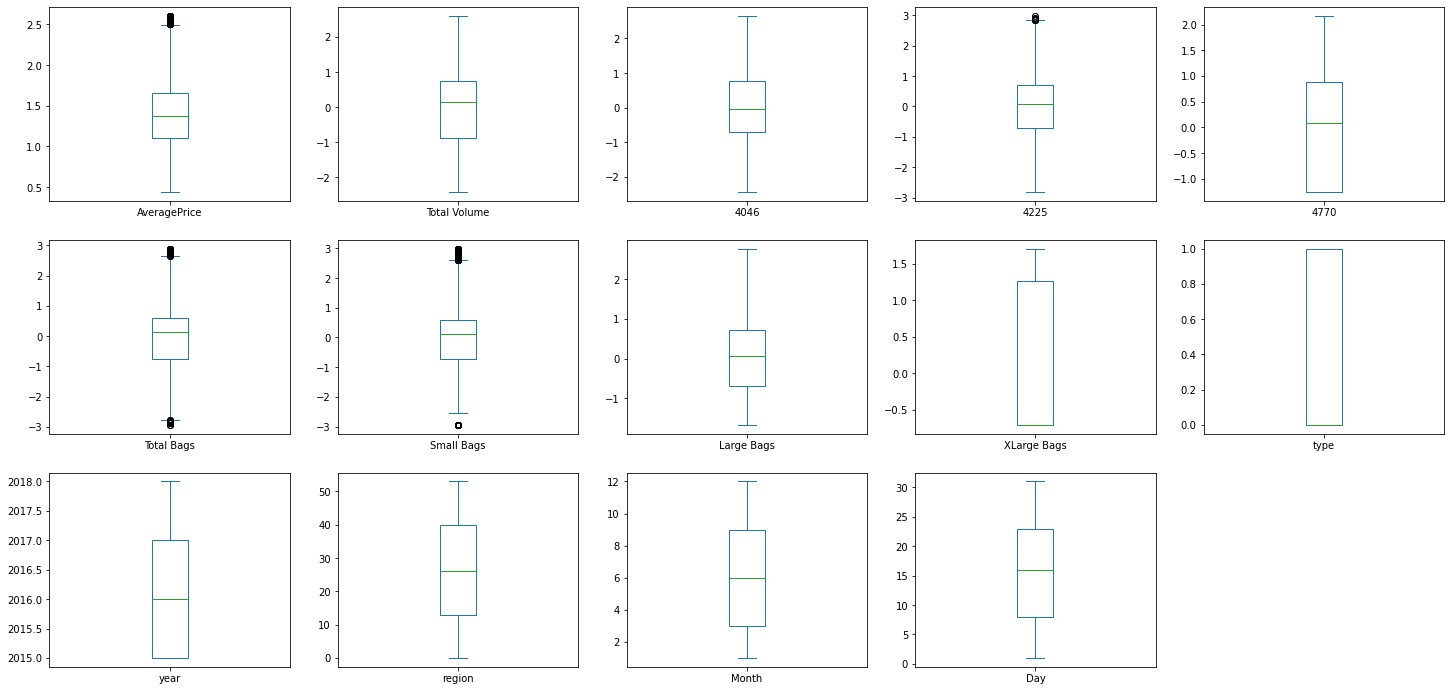

In [37]:
# visualizing
df_x.plot(kind='box',subplots=True, layout=(6,5),figsize=(25,25))

outliers presence has been reduced to some extend

#### Avacado project as Regression problem

checking correlation

In [38]:
df_x.corr()["AveragePrice"].sort_values()

Total Volume   -0.587608
Total Bags     -0.574268
4046           -0.560459
4770           -0.502656
Small Bags     -0.498256
Large Bags     -0.493308
4225           -0.464825
XLarge Bags    -0.410736
region         -0.021247
Day             0.029125
year            0.088809
Month           0.153555
type            0.619084
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

type has the highest correlation and year has the least correlation

#### plotting heatmap to see the correlation with other features

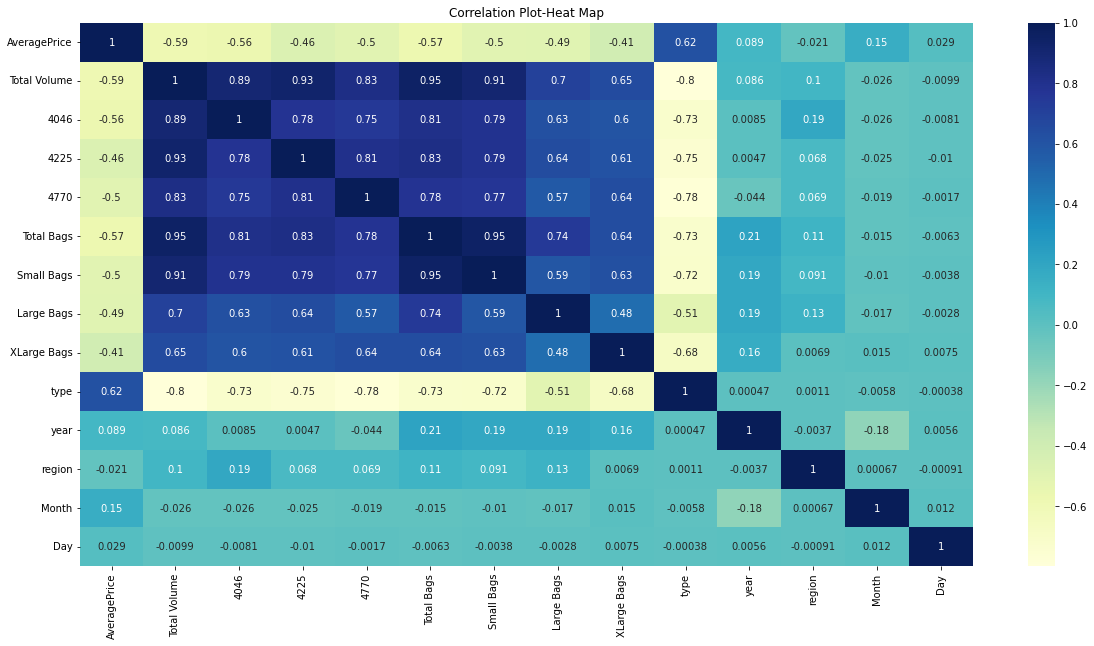

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df_x.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

#### using vif to check for multicolinearity

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df_x.drop(['AveragePrice'],axis=1)
d=sc.fit_transform(df_x)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
1,54.670935,4046
5,36.099072,Small Bags
6,15.500726,Large Bags
3,12.213979,4770
2,7.294585,4225
4,4.224871,Total Bags
9,4.223202,year
7,3.450224,XLarge Bags
0,2.318647,Total Volume
8,2.166689,type


#### removing small bags as 4046 is a type of avacado sold by Has avacado

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=df_x.drop(['Small Bags','AveragePrice'],axis=1)
d=sc.fit_transform(k)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(k.columns))]
vif['features']=k.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
0,53.618240,Total Volume
4,17.531329,Total Bags
2,11.246860,4225
1,7.209179,4046
3,4.153790,4770
7,3.689441,type
5,2.349771,Large Bags
6,2.162642,XLarge Bags
8,1.388172,year
9,1.099733,region


#### dropping small bags and total volume

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=df_x.drop(['Small Bags','AveragePrice','Total Volume'],axis=1)
d=sc.fit_transform(k)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(k.columns))]
vif['features']=k.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
3,6.434528,Total Bags
1,4.549175,4225
2,4.131196,4770
0,3.926492,4046
6,3.431203,type
4,2.297414,Large Bags
5,2.142708,XLarge Bags
7,1.385219,year
8,1.089844,region
9,1.053691,Month


vif is within the limits less than 10


#### deleting the columns and storing it in df_reg

In [43]:
df_reg=df_x
df_reg.drop(['Small Bags','Total Volume'],axis=1,inplace=True)
df_reg

,AveragePrice,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.665056,0.308947,-0.220871,-0.525905,-0.757300,-0.704973,0.0,2015,0.0,12,27
1,1.35,-0.782992,0.232951,-0.179678,-0.487649,-0.748038,-0.704973,0.0,2015,0.0,12,20
2,0.93,-0.738250,0.581980,-0.002695,-0.554021,-0.736236,-0.704973,0.0,2015,0.0,12,13
3,1.08,-0.640642,0.417134,-0.132212,-0.697930,-0.680812,-0.704973,0.0,2015,0.0,12,6
4,1.28,-0.691703,0.226078,-0.122787,-0.671557,-0.594565,-0.704973,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.473424,-0.924841,-1.256593,-0.335636,-0.411537,-0.704973,1.0,2018,53.0,2,4
18245,1.71,-0.626319,-0.669655,-1.256593,-0.498697,-0.479879,-0.704973,1.0,2018,53.0,1,28
18246,1.87,-0.626268,-0.777339,0.387946,-0.492730,-0.914005,-0.704973,1.0,2018,53.0,1,21
18247,1.93,-0.556613,-0.715076,0.387652,-0.425775,-0.882151,-0.704973,1.0,2018,53.0,1,14


#### spliting data

In [44]:
X=df_reg.drop(['AveragePrice'],axis=1)
Y=df_reg['AveragePrice']

#### Trying differnent algorithm

In [45]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[] 
B=[] 
C=[] 
D=[] 
mae=[] 

In [46]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[] 
B=[] 
C=[] 
D=[] 
mae=[] 
#loop used to find the best random state
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=(r2_score(y_test,y_pred))*100
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [47]:
# used to get test accuracy, train accuracy, mse, mae
def te_t(regr,x_train,x_test,y_train,y_test,R):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(r2_score(y_test,y_te)*100,1)}")
    A.append(round(r2_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(r2_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))

In [48]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test,R):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(r2_score(y_train,y_tr)*100,1)
    te_ac=round(r2_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [49]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
R=maxr2_score(reg,X,Y)

r2 score corresponding to  0  is  75.94897249189027
r2 score corresponding to  1  is  76.0268058710065
r2 score corresponding to  2  is  75.12946418911993
r2 score corresponding to  3  is  76.82032004490526
r2 score corresponding to  4  is  75.87367127525447
r2 score corresponding to  5  is  76.99410575726976
r2 score corresponding to  6  is  77.41348923536559
r2 score corresponding to  7  is  77.91095284459632
r2 score corresponding to  8  is  78.43454984236091
r2 score corresponding to  9  is  76.69330471866733
r2 score corresponding to  10  is  76.7152358743311
r2 score corresponding to  11  is  73.58322569459192
r2 score corresponding to  12  is  77.62355918171235
r2 score corresponding to  13  is  76.55633728536537
r2 score corresponding to  14  is  76.26378593217306
r2 score corresponding to  15  is  77.39605561936581
r2 score corresponding to  16  is  73.9415162850328
r2 score corresponding to  17  is  77.34208950664258
r2 score corresponding to  18  is  78.07130450667103
r2 sco

In [50]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test,R)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test,R)

test accuracy is 79.1
train accuracy is 100.0


At cv is 2 cv score is -173.74  
 test accuracy is 79.1 

At cv is 3 cv score is -55.05  
 test accuracy is 79.1 

At cv is 4 cv score is -51.62  
 test accuracy is 79.1 

At cv is 5 cv score is -28.97  
 test accuracy is 79.1 

At cv is 6 cv score is -43.93  
 test accuracy is 79.1 

At cv is 7 cv score is -12.18  
 test accuracy is 79.1 

At cv is 8 cv score is -28.79  
 test accuracy is 79.1 

At cv is 9 cv score is -18.79  
 test accuracy is 79.1 

At cv is 10 cv score is -19.32  
 test accuracy is 79.1 

At cv is 11 cv score is -7.69  
 test accuracy is 79.1 

At cv is 12 cv score is -16.8  
 test accuracy is 79.1 

At cv is 13 cv score is -11.92  
 test accuracy is 79.1 

At cv is 14 cv score is -8.41  
 test accuracy is 79.1 

At cv is 15 cv score is -8.14  
 test accuracy is 79.1 

At cv is 16 cv score is -18.48  
 test accuracy is 79.1 

At cv is 17 cv score is -3.87  
 test accuracy is 79.1 

At cv is 18 cv score is -9.39  
 tes

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
R=maxr2_score(rf_reg,X,Y)

r2 score corresponding to  0  is  88.74400666134818
r2 score corresponding to  1  is  89.0854998642454
r2 score corresponding to  2  is  88.32645969097406
r2 score corresponding to  3  is  88.60698904682629
r2 score corresponding to  4  is  88.59430207726783
r2 score corresponding to  5  is  89.33691714991225
r2 score corresponding to  6  is  88.56314043187001
r2 score corresponding to  7  is  89.0417030807946
r2 score corresponding to  8  is  89.19693854135735
r2 score corresponding to  9  is  89.10773696343651
r2 score corresponding to  10  is  89.64797557560114
r2 score corresponding to  11  is  88.79083758857861
r2 score corresponding to  12  is  89.16237544592825
r2 score corresponding to  13  is  89.08714211911838
r2 score corresponding to  14  is  89.5977330382514
r2 score corresponding to  15  is  88.42625978944487
r2 score corresponding to  16  is  89.50465571598468
r2 score corresponding to  17  is  89.18130210350226
r2 score corresponding to  18  is  89.39565735059612
r2 sco

In [52]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_reg,x2_train,x2_test,y2_train,y2_test,R)
print('\n')
score(rf_reg,x2_train,x2_test,y2_train,y2_test,R)

test accuracy is 89.9
train accuracy is 98.4


At cv is 2 cv score is -131.53  
 test accuracy is 89.9 

At cv is 3 cv score is -8.72  
 test accuracy is 89.9 

At cv is 4 cv score is 11.71  
 test accuracy is 89.9 

At cv is 5 cv score is 22.02  
 test accuracy is 89.9 

At cv is 6 cv score is 13.79  
 test accuracy is 89.9 

At cv is 7 cv score is 29.35  
 test accuracy is 89.9 

At cv is 8 cv score is 30.04  
 test accuracy is 89.9 

At cv is 9 cv score is 32.58  
 test accuracy is 89.9 

At cv is 10 cv score is 36.65  
 test accuracy is 89.9 

At cv is 11 cv score is 43.34  
 test accuracy is 89.9 

At cv is 12 cv score is 41.68  
 test accuracy is 89.9 

At cv is 13 cv score is 42.93  
 test accuracy is 89.9 

At cv is 14 cv score is 42.39  
 test accuracy is 89.9 

At cv is 15 cv score is 42.67  
 test accuracy is 89.9 

At cv is 16 cv score is 41.53  
 test accuracy is 89.9 

At cv is 17 cv score is 45.08  
 test accuracy is 89.9 

At cv is 18 cv score is 43.7  
 test accuracy i

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knr = KNeighborsRegressor()
R=maxr2_score(knr,X,Y)

r2 score corresponding to  0  is  53.292506888513856
r2 score corresponding to  1  is  55.71324115809367
r2 score corresponding to  2  is  56.14359576258242
r2 score corresponding to  3  is  56.63372103884794
r2 score corresponding to  4  is  55.18679638390307
r2 score corresponding to  5  is  56.37105106565197
r2 score corresponding to  6  is  54.3046618395286
r2 score corresponding to  7  is  55.35025756642102
r2 score corresponding to  8  is  55.45267339834587
r2 score corresponding to  9  is  55.364077683357394
r2 score corresponding to  10  is  55.44435759912045
r2 score corresponding to  11  is  56.44479548698471
r2 score corresponding to  12  is  56.19323292829106
r2 score corresponding to  13  is  54.61580763179098
r2 score corresponding to  14  is  56.64842540472497
r2 score corresponding to  15  is  55.20731576936424
r2 score corresponding to  16  is  55.12928036339248
r2 score corresponding to  17  is  55.51715467499372
r2 score corresponding to  18  is  56.485923972126464
r

In [54]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(knr,x3_train,x3_test,y3_train,y3_test,R)
print('\n')
score(knr,x3_train,x3_test,y3_train,y3_test,R)

test accuracy is 57.7
train accuracy is 70.6


At cv is 2 cv score is -207.73  
 test accuracy is 57.7 

At cv is 3 cv score is -50.1  
 test accuracy is 57.7 

At cv is 4 cv score is -46.76  
 test accuracy is 57.7 

At cv is 5 cv score is -21.77  
 test accuracy is 57.7 

At cv is 6 cv score is -24.92  
 test accuracy is 57.7 

At cv is 7 cv score is -17.0  
 test accuracy is 57.7 

At cv is 8 cv score is -19.92  
 test accuracy is 57.7 

At cv is 9 cv score is -17.87  
 test accuracy is 57.7 

At cv is 10 cv score is -20.25  
 test accuracy is 57.7 

At cv is 11 cv score is -18.02  
 test accuracy is 57.7 

At cv is 12 cv score is -21.09  
 test accuracy is 57.7 

At cv is 13 cv score is -21.23  
 test accuracy is 57.7 

At cv is 14 cv score is -22.42  
 test accuracy is 57.7 

At cv is 15 cv score is -20.48  
 test accuracy is 57.7 

At cv is 16 cv score is -24.19  
 test accuracy is 57.7 

At cv is 17 cv score is -21.68  
 test accuracy is 57.7 

At cv is 18 cv score is -23.96  
 

In [55]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
R=maxr2_score(lnr,X,Y)

r2 score corresponding to  0  is  53.02131892342528
r2 score corresponding to  1  is  55.29539661453791
r2 score corresponding to  2  is  53.40388495894861
r2 score corresponding to  3  is  55.48283857270215
r2 score corresponding to  4  is  53.47611183183724
r2 score corresponding to  5  is  55.591286737515944
r2 score corresponding to  6  is  55.509763496873845
r2 score corresponding to  7  is  54.301508904015684
r2 score corresponding to  8  is  55.26629441940032
r2 score corresponding to  9  is  54.78927726372951
r2 score corresponding to  10  is  55.401562595427876
r2 score corresponding to  11  is  54.275997977227334
r2 score corresponding to  12  is  54.182853981543744
r2 score corresponding to  13  is  54.211907622391486
r2 score corresponding to  14  is  56.13576307619748
r2 score corresponding to  15  is  54.35671537138571
r2 score corresponding to  16  is  54.20428776124668
r2 score corresponding to  17  is  54.40807146349186
r2 score corresponding to  18  is  54.29543380958

In [56]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(lnr,x4_train,x4_test,y4_train,y4_test,R)
print('\n')
score(lnr,x4_train,x4_test,y4_train,y4_test,R)

test accuracy is 56.3
train accuracy is 53.9


At cv is 2 cv score is -45.59  
 test accuracy is 56.3 

At cv is 3 cv score is 8.01  
 test accuracy is 56.3 

At cv is 4 cv score is 5.87  
 test accuracy is 56.3 

At cv is 5 cv score is 15.75  
 test accuracy is 56.3 

At cv is 6 cv score is 5.02  
 test accuracy is 56.3 

At cv is 7 cv score is 9.63  
 test accuracy is 56.3 

At cv is 8 cv score is 7.67  
 test accuracy is 56.3 

At cv is 9 cv score is 12.41  
 test accuracy is 56.3 

At cv is 10 cv score is 9.46  
 test accuracy is 56.3 

At cv is 11 cv score is 12.13  
 test accuracy is 56.3 

At cv is 12 cv score is 9.26  
 test accuracy is 56.3 

At cv is 13 cv score is 8.25  
 test accuracy is 56.3 

At cv is 14 cv score is 8.01  
 test accuracy is 56.3 

At cv is 15 cv score is 11.35  
 test accuracy is 56.3 

At cv is 16 cv score is 8.19  
 test accuracy is 56.3 

At cv is 17 cv score is 10.92  
 test accuracy is 56.3 

At cv is 18 cv score is 9.44  
 test accuracy is 56.3 

At

In [57]:
from sklearn.ensemble import AdaBoostRegressor
adboost_reg= AdaBoostRegressor()
R=maxr2_score(adboost_reg,X,Y)

r2 score corresponding to  0  is  55.8382609421688
r2 score corresponding to  1  is  58.17233121224583
r2 score corresponding to  2  is  57.098760449987616
r2 score corresponding to  3  is  58.25205237732938
r2 score corresponding to  4  is  55.75043332319504
r2 score corresponding to  5  is  58.47677531475098
r2 score corresponding to  6  is  57.25191695831357
r2 score corresponding to  7  is  57.25501168876501
r2 score corresponding to  8  is  59.58777514275428
r2 score corresponding to  9  is  57.47909541488268
r2 score corresponding to  10  is  58.087842288951016
r2 score corresponding to  11  is  58.43834595343325
r2 score corresponding to  12  is  56.803001339291114
r2 score corresponding to  13  is  56.01294925645291
r2 score corresponding to  14  is  57.3218281138683
r2 score corresponding to  15  is  56.344480498091045
r2 score corresponding to  16  is  57.558854268875905
r2 score corresponding to  17  is  57.780723965300915
r2 score corresponding to  18  is  56.4802199531421


In [58]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)
print('\n')
score(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)

test accuracy is 59.8
train accuracy is 58.2


At cv is 2 cv score is -210.78  
 test accuracy is 59.8 

At cv is 3 cv score is 2.0  
 test accuracy is 59.8 

At cv is 4 cv score is -3.78  
 test accuracy is 59.8 

At cv is 5 cv score is 4.42  
 test accuracy is 59.8 

At cv is 6 cv score is 1.57  
 test accuracy is 59.8 

At cv is 7 cv score is 11.31  
 test accuracy is 59.8 

At cv is 8 cv score is 7.34  
 test accuracy is 59.8 

At cv is 9 cv score is 9.79  
 test accuracy is 59.8 

At cv is 10 cv score is 11.49  
 test accuracy is 59.8 

At cv is 11 cv score is 10.35  
 test accuracy is 59.8 

At cv is 12 cv score is 8.28  
 test accuracy is 59.8 

At cv is 13 cv score is 6.57  
 test accuracy is 59.8 

At cv is 14 cv score is 9.08  
 test accuracy is 59.8 

At cv is 15 cv score is 10.28  
 test accuracy is 59.8 

At cv is 16 cv score is 9.82  
 test accuracy is 59.8 

At cv is 17 cv score is 10.95  
 test accuracy is 59.8 

At cv is 18 cv score is 9.69  
 test accuracy is 59.8 

A

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg=GradientBoostingRegressor()
R=maxr2_score(grad_reg,X,Y)

r2 score corresponding to  0  is  74.33220105756769
r2 score corresponding to  1  is  74.7818707615638
r2 score corresponding to  2  is  73.0542557039856
r2 score corresponding to  3  is  74.66563577652572
r2 score corresponding to  4  is  73.76092371457914
r2 score corresponding to  5  is  74.81803931409414
r2 score corresponding to  6  is  74.68967343727877
r2 score corresponding to  7  is  74.23096362212998
r2 score corresponding to  8  is  75.05174028442258
r2 score corresponding to  9  is  74.21812894089335
r2 score corresponding to  10  is  74.74570083425667
r2 score corresponding to  11  is  75.05067935286847
r2 score corresponding to  12  is  74.59577318052565
r2 score corresponding to  13  is  74.05795762086223
r2 score corresponding to  14  is  75.55995752732316
r2 score corresponding to  15  is  74.42550694429713
r2 score corresponding to  16  is  74.243254232836
r2 score corresponding to  17  is  74.79865983816542
r2 score corresponding to  18  is  75.85281949257217
r2 scor

In [60]:
x6_train,x6_test,y6_train,y6_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_reg,x6_train,x6_test,y6_train,y6_test,R)
print('\n')
score(grad_reg,x6_train,x6_test,y6_train,y6_test,R)

test accuracy is 75.9
train accuracy is 75.7


At cv is 2 cv score is -122.99  
 test accuracy is 75.9 

At cv is 3 cv score is 15.35  
 test accuracy is 75.9 

At cv is 4 cv score is 28.94  
 test accuracy is 75.9 

At cv is 5 cv score is 40.19  
 test accuracy is 75.9 

At cv is 6 cv score is 33.69  
 test accuracy is 75.9 

At cv is 7 cv score is 37.38  
 test accuracy is 75.9 

At cv is 8 cv score is 40.05  
 test accuracy is 75.9 

At cv is 9 cv score is 43.34  
 test accuracy is 75.9 

At cv is 10 cv score is 42.38  
 test accuracy is 75.9 

At cv is 11 cv score is 46.08  
 test accuracy is 75.9 

At cv is 12 cv score is 44.0  
 test accuracy is 75.9 

At cv is 13 cv score is 45.84  
 test accuracy is 75.9 

At cv is 14 cv score is 44.7  
 test accuracy is 75.9 

At cv is 15 cv score is 45.16  
 test accuracy is 75.9 

At cv is 16 cv score is 44.19  
 test accuracy is 75.9 

At cv is 17 cv score is 46.39  
 test accuracy is 75.9 

At cv is 18 cv score is 45.06  
 test accuracy is

In [61]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
R=maxr2_score(xgb,X,Y)

r2 score corresponding to  0  is  89.65198399751277
r2 score corresponding to  1  is  90.15944150281939
r2 score corresponding to  2  is  89.1507277682385
r2 score corresponding to  3  is  89.68432315390035
r2 score corresponding to  4  is  89.54656185604179
r2 score corresponding to  5  is  90.2103518890922
r2 score corresponding to  6  is  89.90235330835922
r2 score corresponding to  7  is  89.63365471420053
r2 score corresponding to  8  is  90.13555498562022
r2 score corresponding to  9  is  89.85042308038756
r2 score corresponding to  10  is  90.20353918545914
r2 score corresponding to  11  is  89.61310468302834
r2 score corresponding to  12  is  89.6981351047337
r2 score corresponding to  13  is  90.07162355146693
r2 score corresponding to  14  is  90.4061269048226
r2 score corresponding to  15  is  89.59766797140526
r2 score corresponding to  16  is  90.17195077290528
r2 score corresponding to  17  is  90.38424614493974
r2 score corresponding to  18  is  90.11052467349761
r2 scor

In [62]:
x8_train,x8_test,y8_train,y8_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(xgb,x8_train,x8_test,y8_train,y8_test,R)
print('\n')
score(xgb,x8_train,x8_test,y8_train,y8_test,R)

test accuracy is 90.6
train accuracy is 96.0


At cv is 2 cv score is -86.76  
 test accuracy is 90.6 

At cv is 3 cv score is 27.03  
 test accuracy is 90.6 

At cv is 4 cv score is 28.89  
 test accuracy is 90.6 

At cv is 5 cv score is 42.63  
 test accuracy is 90.6 

At cv is 6 cv score is 38.04  
 test accuracy is 90.6 

At cv is 7 cv score is 48.82  
 test accuracy is 90.6 

At cv is 8 cv score is 48.58  
 test accuracy is 90.6 

At cv is 9 cv score is 54.95  
 test accuracy is 90.6 

At cv is 10 cv score is 54.92  
 test accuracy is 90.6 

At cv is 11 cv score is 60.14  
 test accuracy is 90.6 

At cv is 12 cv score is 59.06  
 test accuracy is 90.6 

At cv is 13 cv score is 57.92  
 test accuracy is 90.6 

At cv is 14 cv score is 57.27  
 test accuracy is 90.6 

At cv is 15 cv score is 59.13  
 test accuracy is 90.6 

At cv is 16 cv score is 58.2  
 test accuracy is 90.6 

At cv is 17 cv score is 60.08  
 test accuracy is 90.6 

At cv is 18 cv score is 59.44  
 test accuracy is

In [63]:
from sklearn.linear_model import   Lasso
ls = Lasso()
R=maxr2_score(ls,X,Y)

r2 score corresponding to  0  is  -3.2632674917820736e-05
r2 score corresponding to  1  is  -0.1900703352366806
r2 score corresponding to  2  is  -0.03500561772935562
r2 score corresponding to  3  is  -0.0055619605210832646
r2 score corresponding to  4  is  -0.05355777578532894
r2 score corresponding to  5  is  -0.02694591709921923
r2 score corresponding to  6  is  -0.007627808678734027
r2 score corresponding to  7  is  -0.05805362543733761
r2 score corresponding to  8  is  -0.09757251189332905
r2 score corresponding to  9  is  -0.11893316818221145
r2 score corresponding to  10  is  -0.013505950327763472
r2 score corresponding to  11  is  -0.007857002196920426
r2 score corresponding to  12  is  -0.0011533918336859017
r2 score corresponding to  13  is  -0.001798076322345743
r2 score corresponding to  14  is  -0.03604446215954571
r2 score corresponding to  15  is  -0.0002370877795643267
r2 score corresponding to  16  is  -0.00478988732335317
r2 score corresponding to  17  is  -0.02939590

UnboundLocalError: local variable 'final_r_state' referenced before assignment

In [64]:
x9_train,x9_test,y9_train,y9_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(ls,x9_train,x9_test,y9_train,y9_test,R)
print('\n')
score(ls,x9_train,x9_test,y9_train,y9_test,R)

test accuracy is -0.0
train accuracy is 0.0


At cv is 2 cv score is -259.33  
 test accuracy is -0.0 

At cv is 3 cv score is -143.24  
 test accuracy is -0.0 

At cv is 4 cv score is -148.58  
 test accuracy is -0.0 

At cv is 5 cv score is -117.28  
 test accuracy is -0.0 

At cv is 6 cv score is -138.99  
 test accuracy is -0.0 

At cv is 7 cv score is -124.76  
 test accuracy is -0.0 

At cv is 8 cv score is -124.79  
 test accuracy is -0.0 

At cv is 9 cv score is -118.44  
 test accuracy is -0.0 

At cv is 10 cv score is -120.49  
 test accuracy is -0.0 

At cv is 11 cv score is -115.82  
 test accuracy is -0.0 

At cv is 12 cv score is -123.69  
 test accuracy is -0.0 

At cv is 13 cv score is -121.44  
 test accuracy is -0.0 

At cv is 14 cv score is -121.13  
 test accuracy is -0.0 

At cv is 15 cv score is -113.33  
 test accuracy is -0.0 

At cv is 16 cv score is -119.28  
 test accuracy is -0.0 

At cv is 17 cv score is -112.36  
 test accuracy is -0.0 

At cv is 18 cv sco

#### Creating Table to view data

In [65]:
L=['DT','RF','KNN','LR','ADA','GRAD','XGB','Lasso']

In [66]:
E=pd.DataFrame({'test accuracy':A,'cv_score': B,'diff':D,'mse':C,'mae':mae},index=L)
E.sort_values(by=['diff','test accuracy', 'mse', 'mae' ])

,test accuracy,cv_score,diff,mse,mae
XGB,90.6,62.278495,28.321505,0.013987,0.087451
GRAD,75.9,46.390442,29.509558,0.036448,0.146117
LR,56.3,15.752848,40.547152,0.066245,0.205105
RF,89.9,46.277721,43.622279,0.015047,0.087857
ADA,59.8,11.491072,48.308928,0.063336,0.203245
KNN,57.7,0.000000,74.697653,0.063690,0.196758
DT,79.1,0.000000,82.971541,0.031768,0.119687
Lasso,-0.0,0.000000,100.000000,0.148217,0.316553


#### Inference
- XGB is the best model
    - highest test accuracy
    - highest cv_score
    - least differnce between cv_score and test accuracy
    - least error mse and mae

#### Hyper paramter tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [75]:
from xgboost import XGBRegressor

In [86]:
par={'max_depth':[5,6,7,8],
     'gamma':[0,1,2],
     'min_child_weight' :[1,2,3],
     'learning_rate':[0.1, 0.2, 0.3, 0.4],
     'n_estimators':[500,600,700,800]
    
}

In [87]:
gridss=GridSearchCV(xgb,par,cv=2)
gridss.fit(x8_train,y8_train)
gridss.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 800}

In [88]:

gradss=XGBRegressor(gamma=0,learning_rate=0.1,max_depth=6,min_child_weight=1,n_estimators=800)
gradss.fit(x8_train,y8_train)
y_te=gradss.predict(x8_test)
r2=round(r2_score(y8_test,y_te)*100,2)
print(r2)

92.29


In [89]:
cv_score=cross_val_score(gradss,X,Y,cv=19)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

65.73


- both cv_score and test accuracy increased
- difference between cv_score and test accuracy decreased


#### Storing model and loading it

In [92]:
import pickle

In [93]:
filename='Avacado_r.pkl'
pickle.dump(grad,open(filename,'wb'))

In [96]:
l_m=pickle.load(open('Avacado_r.pkl','rb'))
re=l_m.score(x8_test,y8_test)
print(re*100)

92.64485447892824


#### Avacado project as classification problem

checking correlation

In [97]:
df_x.corr()["region"].sort_values()

AveragePrice   -0.021247
year           -0.003694
Day            -0.000914
Month           0.000666
type            0.001058
XLarge Bags     0.006894
4225            0.067937
4770            0.069249
Total Bags      0.107831
Large Bags      0.126882
4046            0.187100
region          1.000000
Name: region, dtype: float64

very less correlation with the target

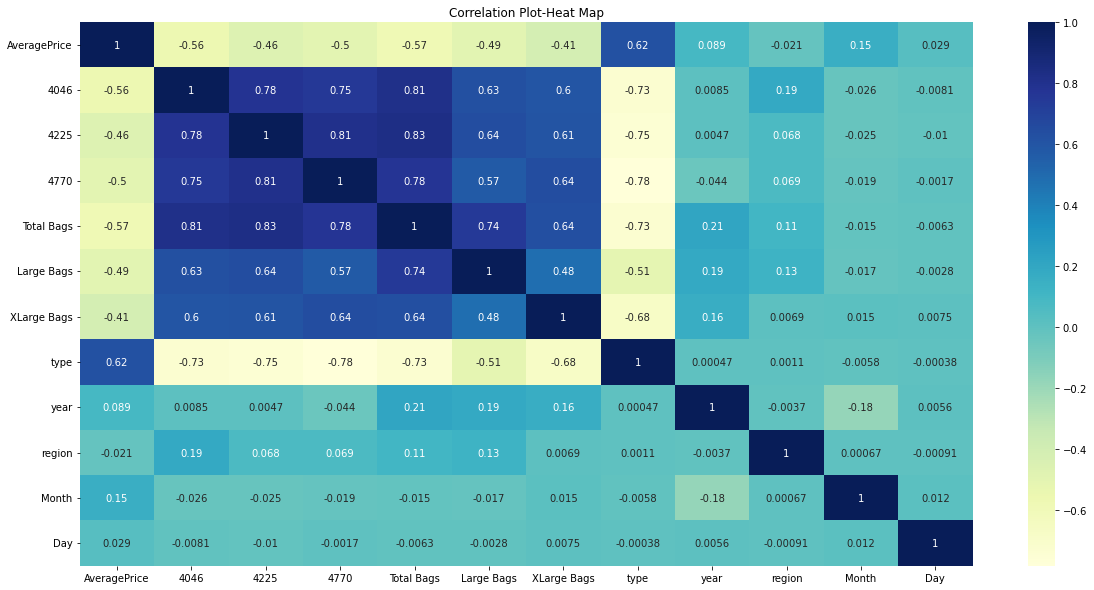

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(df_x.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

#### using vif to check for multicolinearity

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df_x.drop(['region'],axis=1)
d=sc.fit_transform(df_x)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
4,6.899029,Total Bags
2,4.919922,4225
3,4.175230,4770
7,4.035095,type
1,3.953860,4046
5,2.406979,Large Bags
0,2.193123,AveragePrice
6,2.144078,XLarge Bags
8,1.540528,year
10,1.143689,Day


vif is within limits less than 10

#### checking if data is imbalanced

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64




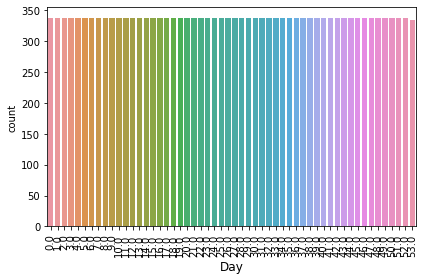

In [100]:
sns.countplot(df['region'])
plt.xlabel(column,fontsize=12)
plt.xticks(rotation=90)
print(df['region'].value_counts())
print('\n')
plt.tight_layout() 

 the data is not imbalanced

#### Splitting dataset

In [101]:
X=df_x.drop(columns=["region"])
Y=df_x[["region"]]

#### Running Algorithm

In [102]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
A=[]
B=[]
C=[]
D=[]
E=[]
mae=[]

In [103]:
#loop used to find the best random state
def max_aucroc_score(regr,X,Y):
    max_aucroc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = r_state, test_size=0.20,stratify=Y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        aucroc_scr=(accuracy_score(y_test,y_pred))*100
        print("accuracy score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [104]:
# used to get test accuracy, train accuracy, mse, mae,F1score,confusion matrix,classification report and auc score
def te_t(regr,x_train,x_test,y_train,y_test):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(accuracy_score(y_test,y_te)*100,1)}")
    A.append(round(accuracy_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(accuracy_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    print("Confusion matrix \n",confusion_matrix(y_test,y_te))
    print('\n')
    print("classification report \n",classification_report(y_test,y_te))


In [105]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(accuracy_score(y_train,y_tr)*100,1)
    te_ac=round(accuracy_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [106]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
R=max_aucroc_score(reg,X,Y)

accuracy score corresponding to  0  is  79.39545202440377
accuracy score corresponding to  1  is  79.64503605102607
accuracy score corresponding to  2  is  79.03494176372712
accuracy score corresponding to  3  is  79.00721020521353
accuracy score corresponding to  4  is  78.97947864669995
accuracy score corresponding to  5  is  78.67443150305047
accuracy score corresponding to  6  is  78.86855241264558
accuracy score corresponding to  7  is  79.00721020521353
accuracy score corresponding to  8  is  79.72823072656684
accuracy score corresponding to  9  is  78.6189683860233
accuracy score corresponding to  10  is  79.78369384359401
accuracy score corresponding to  11  is  79.61730449251247
accuracy score corresponding to  12  is  78.28618968386023
accuracy score corresponding to  13  is  77.48197448696617
accuracy score corresponding to  14  is  79.45091514143094
accuracy score corresponding to  15  is  79.28452579034942
accuracy score corresponding to  16  is  79.45091514143094
accuracy

In [107]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test)

test accuracy is 79.6
train accuracy is 100.0
Confusion matrix 
 [[50  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  2]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  1  1 ...  0  0 42]]


classification report 
               precision    recall  f1-score   support

         0.0       0.93      0.78      0.85        64
         1.0       0.65      0.80      0.72        64
         2.0       0.92      0.84      0.88        68
         3.0       0.80      0.82      0.81        67
         4.0       0.84      0.84      0.84        73
         5.0       0.71      0.84      0.77        64
         6.0       0.94      0.96      0.95        71
         7.0       0.84      0.82      0.83        78
         8.0       0.93      0.96      0.94        77
         9.0       0.90      0.79      0.84        67
        10.0       0.70      0.65      0.67        65
        11.0       0.83      0.87      0.85        68
        12.0       0.89      0.88      0.88       

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
R=max_aucroc_score(rf_c,X,Y)

accuracy score corresponding to  0  is  91.48641153632833
accuracy score corresponding to  1  is  91.8191902384914
accuracy score corresponding to  2  is  90.73765945646144
accuracy score corresponding to  3  is  90.43261231281198
accuracy score corresponding to  4  is  91.29229062673322
accuracy score corresponding to  5  is  90.82085413200221
accuracy score corresponding to  6  is  90.8485856905158
accuracy score corresponding to  7  is  91.34775374376039
accuracy score corresponding to  8  is  91.73599556295063
accuracy score corresponding to  9  is  90.68219633943427
accuracy score corresponding to  10  is  91.43094841930116
accuracy score corresponding to  11  is  91.01497504159734
accuracy score corresponding to  12  is  92.01331114808652
accuracy score corresponding to  13  is  91.8191902384914
accuracy score corresponding to  14  is  90.93178036605657
accuracy score corresponding to  15  is  91.07043815862451
accuracy score corresponding to  16  is  91.18136439267886
accuracy s

In [109]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_c,x2_train,x2_test,y2_train,y2_test)
print('\n')
score(rf_c,x2_train,x2_test,y2_train,y2_test)

test accuracy is 91.3
train accuracy is 100.0
Confusion matrix 
 [[49  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  0  1 ...  0  0 60]]


classification report 
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        53
         1.0       0.87      0.81      0.84        67
         2.0       0.94      1.00      0.97        60
         3.0       0.93      0.76      0.84        71
         4.0       0.96      0.95      0.95        73
         5.0       0.86      0.90      0.88        61
         6.0       1.00      0.97      0.99        72
         7.0       0.97      0.97      0.97        61
         8.0       1.00      0.96      0.98        70
         9.0       0.95      0.94      0.94        77
        10.0       0.79      0.89      0.83        62
        11.0       0.95      0.90      0.92        67
        12.0       0.96      0.94      0.95       

In [110]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
R=max_aucroc_score(kc,X,Y)

accuracy score corresponding to  0  is  1.913477537437604
accuracy score corresponding to  1  is  1.8580144204104272
accuracy score corresponding to  2  is  2.3017193566278427
accuracy score corresponding to  3  is  2.3017193566278427
accuracy score corresponding to  4  is  2.4126455906821964
accuracy score corresponding to  5  is  2.2185246810870773
accuracy score corresponding to  6  is  2.3017193566278427
accuracy score corresponding to  7  is  2.3017193566278427
accuracy score corresponding to  8  is  1.968940654464781
accuracy score corresponding to  9  is  2.52357182473655
accuracy score corresponding to  10  is  2.246256239600666
accuracy score corresponding to  11  is  2.246256239600666
accuracy score corresponding to  12  is  2.0521353300055463
accuracy score corresponding to  13  is  1.8025513033832503
accuracy score corresponding to  14  is  2.1353300055463116
accuracy score corresponding to  15  is  2.2185246810870773
accuracy score corresponding to  16  is  1.9966722129783

In [111]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(kc,x3_train,x3_test,y3_train,y3_test)
print('\n')
score(kc,x3_train,x3_test,y3_train,y3_test)

test accuracy is 2.5
train accuracy is 26.1
Confusion matrix 
 [[ 6  0  2 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  6  3 ... 11  5  0]
 [ 0  1  0 ...  0  0  0]
 [ 1 24 11 ...  0  0  0]]


classification report 
               precision    recall  f1-score   support

         0.0       0.02      0.07      0.03        85
         1.0       0.00      0.01      0.00        70
         2.0       0.02      0.09      0.03        76
         3.0       0.09      0.17      0.12        65
         4.0       0.04      0.08      0.05        76
         5.0       0.02      0.04      0.03        67
         6.0       0.03      0.10      0.04        58
         7.0       0.02      0.08      0.04        63
         8.0       0.06      0.12      0.08        64
         9.0       0.01      0.03      0.02        64
        10.0       0.00      0.02      0.01        64
        11.0       0.03      0.06      0.04        86
        12.0       0.04      0.10      0.06        5

In [112]:
from sklearn.ensemble import AdaBoostClassifier
adboost_c=AdaBoostClassifier()
R=max_aucroc_score(adboost_c,X,Y)

accuracy score corresponding to  0  is  8.374930671103716
accuracy score corresponding to  1  is  6.2673322240709926
accuracy score corresponding to  2  is  5.795895729339988
accuracy score corresponding to  3  is  7.5429839156960625
accuracy score corresponding to  4  is  6.627842484747642
accuracy score corresponding to  5  is  7.182473655019413
accuracy score corresponding to  6  is  7.487520798668886
accuracy score corresponding to  7  is  8.208541320022185
accuracy score corresponding to  8  is  7.931225734886301
accuracy score corresponding to  9  is  6.322795341098169
accuracy score corresponding to  10  is  7.376594564614532
accuracy score corresponding to  11  is  4.769828064337216
accuracy score corresponding to  12  is  7.5429839156960625
accuracy score corresponding to  13  is  7.487520798668886
accuracy score corresponding to  14  is  6.9606211869107035
accuracy score corresponding to  15  is  8.985024958402663
accuracy score corresponding to  16  is  7.0992789794786475
ac

In [113]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_c,x4_train,x4_test,y4_train,y4_test)
print('\n')
score(adboost_c,x4_train,x4_test,y4_train,y4_test)

test accuracy is 7.6
train accuracy is 7.6
Confusion matrix 
 [[ 0  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0 11 ... 24  0  0]
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0  0  0]]


classification report 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        75
         1.0       0.20      0.48      0.28        66
         2.0       0.12      0.49      0.19        68
         3.0       0.00      0.00      0.00        57
         4.0       0.03      0.15      0.05        62
         5.0       0.00      0.00      0.00        64
         6.0       0.00      0.00      0.00        73
         7.0       1.00      0.05      0.10        60
         8.0       0.00      0.00      0.00        64
         9.0       0.00      0.00      0.00        77
        10.0       0.00      0.00      0.00        64
        11.0       0.17      0.50      0.25        70
        12.0       0.00      0.00      0.00        70

#### Creating Table to store datas

In [114]:
aa=['DT','RF','KNN','ADA']

In [115]:
kk=pd.DataFrame({'test accuracy':A,'max_cv_score': B,'diff':D,'mse':C,'mae':mae},index=aa)
kk.sort_values(by=['diff','test accuracy', 'mse', 'mae' ])

,test accuracy,max_cv_score,diff,mse,mae
ADA,7.6,6.811707,0.788293,388.305324,15.383527
KNN,2.5,15.725130,0.935767,610.981974,20.313644
RF,91.3,82.403869,8.896131,41.975042,1.605103
DT,79.6,67.687500,11.912500,90.936217,3.617304


#### Inference

- RF is the best model
    - highest test accuracy
    - highest cv_score
    - third highesr difference
    - least error mse and mae

#### Hyper paramter tuning

In [129]:
par={'n_estimators': [200, 300, 400], 
     'max_features': ['log2', 'sqrt','auto'],
     'criterion': ['entropy', 'gini'],
     'max_depth': [50, 60, 70, 80],
     'min_samples_split':[2, 3, 4]
}

In [130]:
grid=GridSearchCV( rf_c,par,cv=2)
grid.fit(x2_train,y2_train)
grid.best_params_  

{'criterion': 'entropy',
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 400}

In [131]:
rf=RandomForestClassifier( criterion= 'entropy', max_depth = 70, max_features= 'sqrt', min_samples_split= 2, n_estimators= 400)
rf.fit(x2_train,y2_train)
y_te=rf.predict(x2_test)
r2=round(accuracy_score(y2_test,y_te)*100,1)
print(r2)

91.6


In [132]:
cv_score=cross_val_score(rf,X,Y,cv=19)
cv_mean=cv_score.mean()*100
print(cv_mean)

82.91431751271311


- very minor increase in cv_score and test accuracy

#### Storing model and loading it

In [135]:
filename='avacado_c.pkl'
pickle.dump(grad,open(filename,'wb'))

In [137]:
l_m=pickle.load(open('avacado_c.pkl','rb'))
r2=round(accuracy_score(y2_test,y_te)*100,1)
print(r2)

91.3
